In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

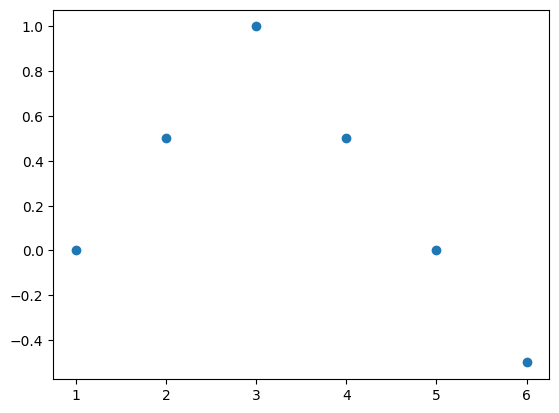

In [88]:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0.5, 1, 0.5, 0, -0.5])
plt.scatter(X,y)

In [114]:
X_seq = []
y_seq = []
num = 3
for i in range(len(X) - num):
    X_seq.append(X[i:i+num])
    y_seq.append(y[i+num])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [116]:
print(X_seq, y_seq)

[[1 2 3]
 [2 3 4]
 [3 4 5]] [ 0.5  0.  -0.5]


In [118]:
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

In [120]:
print(X_seq)

[[[1]
  [2]
  [3]]

 [[2]
  [3]
  [4]]

 [[3]
  [4]
  [5]]]


In [126]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [128]:
model.fit(X_seq, y_seq, epochs=300, verbose=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1644
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1586
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1542
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1511
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1490
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1476
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1464
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1450
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1434
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1414
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1393
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1371
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1349
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1328
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1308
Epoch 16/300
1/1 ━━━━

In [154]:
X_pred = X.reshape((2, 3, 1))
y_pred = model.predict(X_pred, verbose=0)

print("Predicted y for X:", y_pred)

Predicted y for X: [[ 0.5001686]
 [-1.0366915]]


In [146]:
X.reshape(2,3,1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [160]:
import yfinance as yf

data = yf.download(['^GSPC', 'AAPL'], start='2010-01-01', end='2025-01-01')

close_df = data['Close'].copy()

close_df.columns = ['S&P 500', 'Apple']

[*********************100%***********************]  2 of 2 completed


In [214]:
X = close_df['S&P 500'].values
y = close_df['Apple'].values

In [267]:
def smoothening(data):
    # Smooth the data
    window_size = 20
    smoothed_y = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return smoothed_y

X = smoothening(X)
y = smoothening(y)

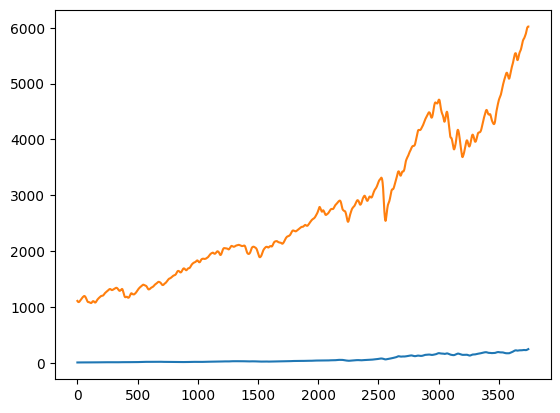

In [269]:
plt.plot(X)
plt.plot(y)

In [271]:
from sklearn.preprocessing import MinMaxScaler

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

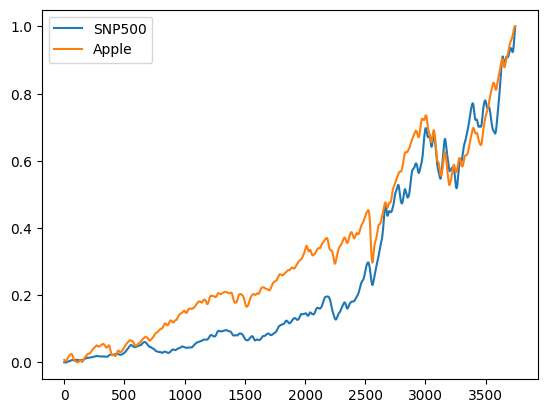

In [273]:
plt.plot(X_scaled, label = 'SNP500')
plt.plot(y_scaled, label = 'Apple')
plt.legend()
plt.show()

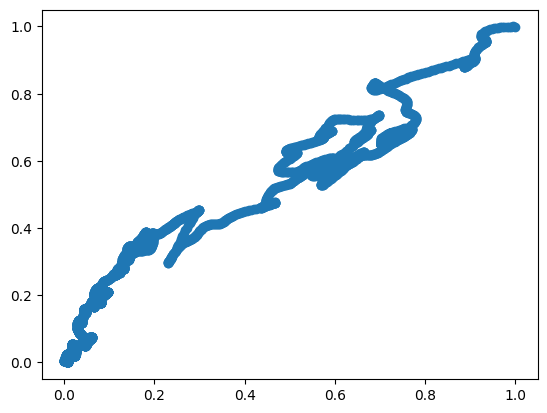

In [277]:
plt.scatter(X_scaled, y_scaled)

In [321]:
X = X_scaled.reshape(-1)
y = y_scaled.reshape(-1)

In [323]:
X_seq = []
y_seq = []
num = 10
for i in range(len(X) - num):
    X_seq.append(X[i:i+num])
    y_seq.append(y[i+num])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [325]:
print(X_seq, y_seq)

[[5.58566838e-04 4.73465618e-04 3.91924996e-04 ... 8.96174782e-05
  4.82559585e-05 1.77836717e-05]
 [4.73465618e-04 3.91924996e-04 3.14378998e-04 ... 4.82559585e-05
  1.77836717e-05 3.65478333e-06]
 [3.91924996e-04 3.14378998e-04 2.44709075e-04 ... 1.77836717e-05
  3.65478333e-06 0.00000000e+00]
 ...
 [9.44390652e-01 9.48611308e-01 9.53022295e-01 ... 9.76115922e-01
  9.80997268e-01 9.85914111e-01]
 [9.48611308e-01 9.53022295e-01 9.57528833e-01 ... 9.80997268e-01
  9.85914111e-01 9.90785434e-01]
 [9.53022295e-01 9.57528833e-01 9.62034629e-01 ... 9.85914111e-01
  9.90785434e-01 9.95551517e-01]] [0.00353917 0.00357368 0.00367501 ... 0.99983063 1.         0.99979685]


In [327]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(num, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\muthu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [329]:
model.fit(X_seq, y_seq, epochs=100, verbose=1)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1058
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 12/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 13/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016
Epoch 14/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 15/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1

In [331]:
X_pred = X.reshape(X.shape[0],1)
y_pred = model.predict(X_pred, verbose=0)

print("Predicted y for X:", y_pred)

Predicted y for X: [[0.12984894]
 [0.12982646]
 [0.12980491]
 ...
 [0.23937663]
 [0.23979247]
 [0.24018084]]


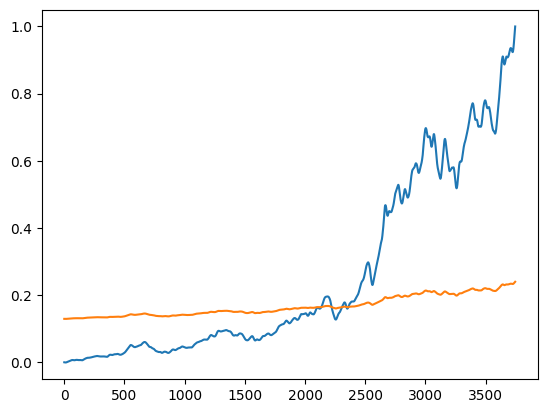

In [333]:
plt.plot(X_pred)
plt.plot(y_pred)

In [335]:
X_rescaled = scaler_X.inverse_transform(X_pred)
y_rescaled = scaler_y.inverse_transform(y_pred)

In [349]:
predicted_values = np.zeros(num-1)
for i in range(num-1):
      predicted_values[i] = y_rescaled[-i-1]
y_predicted = predicted_values[::-1]

C:\Users\muthu\AppData\Local\Temp\ipykernel_43788\133452130.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_values[i] = y_rescaled[-i-1]


In [351]:
y_predicted

array([2243.13330078, 2245.12158203, 2247.20751953, 2249.30151367,
       2251.40332031, 2253.52294922, 2255.62524414, 2257.68481445,
       2259.6081543 ])

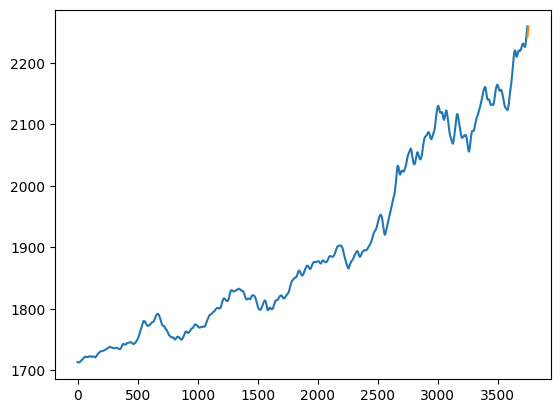

In [353]:
plt.plot(range(0,len(y_rescaled)), y_rescaled)
plt.plot(range(len(y_rescaled), len(y_rescaled)+len(y_predicted)), y_predicted)